# Simulate binary and catepillar tree

Mamie Wang 05/11/20

Goal: 

- Additional test of the spectral tree method on two simulated datasets
- plot the influenza tree as an example
- organize the result from influenza tree

## Binary tree


A complete binary tree of 512 terminal nodes and n=1000 samples

- compare between 1. RAXML, 2. deep+RAXML, 3. deep+NJ, 4. deep+SNJ, 5. NJ and SNJ

In [ ]:
m = 512
n = 1000

## Catepillar tree

A caterpillar tree with m=128 terminal nodes and 1000 samples

- compare between 1. RAXML, 2. deep+RAXML, 3. deep+NJ, 4. deep+SNJ, 5. NJ and SNJ

In [ ]:
m = 128
n = 1000

## Organize influenza tree results

In [1]:
library(ape)

In [2]:
H3N2_path = "/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/data/NY_H3N2.newick"

In [3]:
H3N2_tree = read.tree(H3N2_path)

png 
  2

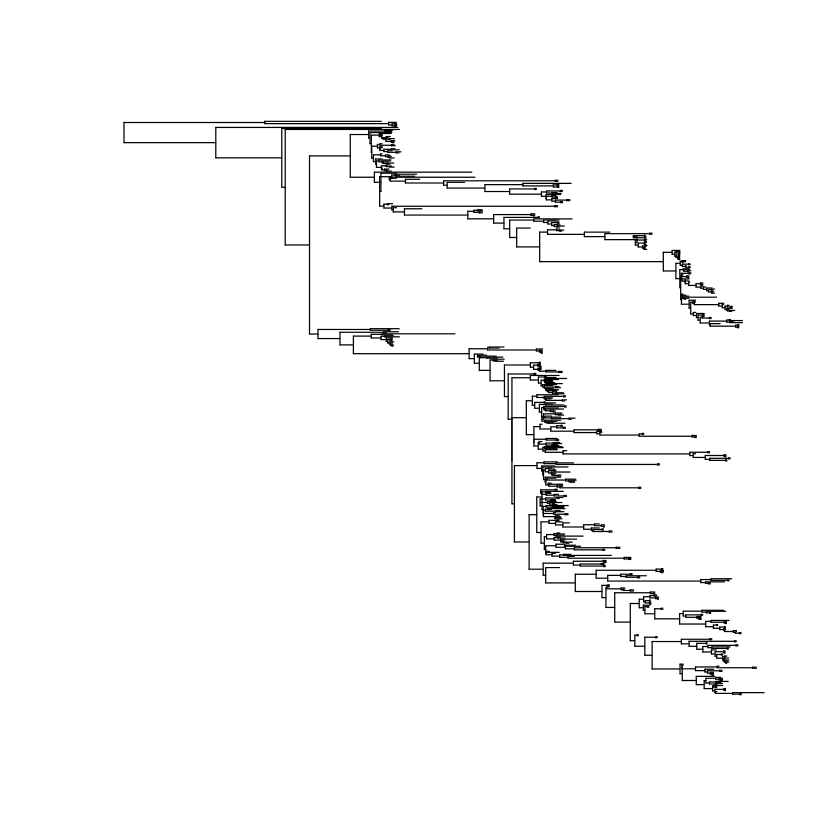

In [8]:
# plot the beast tree
plot(ladderize(H3N2_tree), show.tip.label = F)

# save the plot
svg("/gpfs/ysm/project/kleinstein/mw957/repos/spec_tree/figs/H3N2_tree.svg")
plot(ladderize(H3N2_tree), show.tip.label = F)
dev.off()

In [ ]:
# use the result from the angle method
